<h1>Содержание<span class="tocSkip"></span></h1>
<div></ul></li><li><span><a href="#Подготовка-данных" data-toc-modified-id="Подготовка-данных-1"><span class="toc-item-num">1&nbsp;&nbsp;</span>Подготовка данных</a></span></li><li><span><a href="#Исследование-задачи" data-toc-modified-id="Исследование-задачи-2"><span class="toc-item-num">2&nbsp;&nbsp;</span>Исследование задачи</a></span></li><li><span><a href="#Борьба-с-дисбалансом" data-toc-modified-id="Борьба-с-дисбалансом-3"><span class="toc-item-num">3&nbsp;&nbsp;</span>Борьба с дисбалансом</a></span></li><li><span><a href="#Тестирование-модели" data-toc-modified-id="Тестирование-модели-4"><span class="toc-item-num">4&nbsp;&nbsp;</span>Тестирование модели</a></span>
</div>

# Отток клиентов

Из «Бета-Банка» стали уходить клиенты. Каждый месяц. Немного, но заметно. Банковские маркетологи посчитали: сохранять текущих клиентов дешевле, чем привлекать новых.

Нужно спрогнозировать, уйдёт клиент из банка в ближайшее время или нет. Вам предоставлены исторические данные о поведении клиентов и расторжении договоров с банком. 

Построим модель с предельно большим значением *F1*-меры. Критерии для метрики F1 >= 0.59.


## Подготовка данных

In [1]:
import warnings
warnings.filterwarnings('ignore')

In [2]:
import pandas as pd
from sklearn.ensemble import RandomForestRegressor
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import f1_score
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import roc_auc_score 
from sklearn.metrics import roc_curve 
import matplotlib.pyplot as plt
from sklearn.utils import shuffle

In [3]:
data = pd.read_csv('/datasets/Churn.csv')

In [4]:
data.head()

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,1,15634602,Hargrave,619,France,Female,42,2.0,0.00,1,1,1,101348.88,1
1,2,15647311,Hill,608,Spain,Female,41,1.0,83807.86,1,0,1,112542.58,0
2,3,15619304,Onio,502,France,Female,42,8.0,159660.80,3,1,0,113931.57,1
3,4,15701354,Boni,699,France,Female,39,1.0,0.00,2,0,0,93826.63,0
4,5,15737888,Mitchell,850,Spain,Female,43,2.0,125510.82,1,1,1,79084.10,0


In [5]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 14 columns):
RowNumber          10000 non-null int64
CustomerId         10000 non-null int64
Surname            10000 non-null object
CreditScore        10000 non-null int64
Geography          10000 non-null object
Gender             10000 non-null object
Age                10000 non-null int64
Tenure             9091 non-null float64
Balance            10000 non-null float64
NumOfProducts      10000 non-null int64
HasCrCard          10000 non-null int64
IsActiveMember     10000 non-null int64
EstimatedSalary    10000 non-null float64
Exited             10000 non-null int64
dtypes: float64(3), int64(8), object(3)
memory usage: 1.1+ MB


In [6]:
data = data.dropna(subset=["Tenure"]).reset_index(drop=True)
data.isna().sum()

RowNumber          0
CustomerId         0
Surname            0
CreditScore        0
Geography          0
Gender             0
Age                0
Tenure             0
Balance            0
NumOfProducts      0
HasCrCard          0
IsActiveMember     0
EstimatedSalary    0
Exited             0
dtype: int64

In [7]:
data = data.drop(["Surname",'RowNumber','CustomerId'], axis=1)

In [8]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9091 entries, 0 to 9090
Data columns (total 11 columns):
CreditScore        9091 non-null int64
Geography          9091 non-null object
Gender             9091 non-null object
Age                9091 non-null int64
Tenure             9091 non-null float64
Balance            9091 non-null float64
NumOfProducts      9091 non-null int64
HasCrCard          9091 non-null int64
IsActiveMember     9091 non-null int64
EstimatedSalary    9091 non-null float64
Exited             9091 non-null int64
dtypes: float64(3), int64(6), object(2)
memory usage: 781.4+ KB


In [9]:
#from sklearn.preprocessing import OrdinalEncoder
#encoder = OrdinalEncoder()
#data_ordinal = pd.DataFrame(encoder.fit_transform(data),
                            #columns=data.columns)

In [10]:
data_ordinal = pd.get_dummies(data, columns=["Gender", "Geography"], prefix=["Gend", "Geog"])

In [11]:
data_ordinal.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9091 entries, 0 to 9090
Data columns (total 14 columns):
CreditScore        9091 non-null int64
Age                9091 non-null int64
Tenure             9091 non-null float64
Balance            9091 non-null float64
NumOfProducts      9091 non-null int64
HasCrCard          9091 non-null int64
IsActiveMember     9091 non-null int64
EstimatedSalary    9091 non-null float64
Exited             9091 non-null int64
Gend_Female        9091 non-null uint8
Gend_Male          9091 non-null uint8
Geog_France        9091 non-null uint8
Geog_Germany       9091 non-null uint8
Geog_Spain         9091 non-null uint8
dtypes: float64(3), int64(6), uint8(5)
memory usage: 683.7 KB


In [12]:
data_ordinal.head()

,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited,Gend_Female,Gend_Male,Geog_France,Geog_Germany,Geog_Spain
0,619,42,2.0,0.00,1,1,1,101348.88,1,1,0,1,0,0
1,608,41,1.0,83807.86,1,0,1,112542.58,0,1,0,0,0,1
2,502,42,8.0,159660.80,3,1,0,113931.57,1,1,0,1,0,0
3,699,39,1.0,0.00,2,0,0,93826.63,0,1,0,1,0,0
4,850,43,2.0,125510.82,1,1,1,79084.10,0,1,0,0,0,1


In [13]:
target = data_ordinal['Exited']
features = data_ordinal.drop(['Exited'], axis=1)
features_train, features_validt, target_train, target_validt = train_test_split(features, target, test_size = 0.5, random_state =12345, stratify = data_ordinal['Exited'])
features_valid, features_test, target_valid, target_test = train_test_split(features_validt, target_validt, test_size = 0.5, random_state =12345, stratify = target_validt)

In [14]:
numeric = ['CreditScore', 'Age', 'Tenure', 'Balance', 'EstimatedSalary']
scaler = StandardScaler()
scaler.fit(features_train[numeric]) 
features_train[numeric] = scaler.transform(features_train[numeric])
features_valid[numeric] = scaler.transform(features_valid[numeric])
features_test[numeric] = scaler.transform(features_test[numeric])
pd.options.mode.chained_assignment = None

## Исследование задачи

In [15]:
best_model = None
best_result = 0
best_est = 0
best_depth = 0
for est in range(10, 101, 10): 
    for depth in range (1, 15):
        model = RandomForestClassifier(random_state=12345, n_estimators=est, max_depth=depth)
        model.fit(features_train, target_train) 
        predictions_valid = model.predict(features_valid) 
        result = f1_score(target_valid, predictions_valid)
        if result > best_result:
            best_model = model
            best_result = result
            best_est = est
            best_depth = depth

print("F1", best_result, "Количество деревьев:", best_est, "Глубина:", depth)

F1 0.5749656121045392 Количество деревьев: 80 Глубина: 14


In [16]:
best_model_tr = None
best_result1 = 0
best_depth1 = 0
for depth in range(1, 15):
    model1 = DecisionTreeClassifier(random_state=12345, max_depth=depth) 
    model1.fit(features_train, target_train) 
    predictions_valid1 = model1.predict(features_valid) 
    result = f1_score(target_valid, predictions_valid1)
    if result > best_result1:
        best_model_tr = model1
        best_result1 = result
        best_depth1 = depth

print("F1:", best_result1, "Глубина дерева:", best_depth1)

F1: 0.5747126436781609 Глубина дерева: 7


In [17]:
log_f1 = 0 
for n in range(1,2):
    for i in range(100,110):
        model_log1 = LogisticRegression(solver = 'liblinear', max_iter = i, C = n)
        model_log1.fit(features_train, target_train)
        model_log_prediction = model_log1.predict(features_valid)
        new_f1 = f1_score(target_valid, model_log_prediction)
        if new_f1 > log_f1:
            log_f1 = new_f1
            model_log = model_log1


print("F1:",log_f1)

F1: 0.3074433656957929


Иследовав модели, мы не смогли достигнуть желаемых значений метрики. У логической регрессии наименьший показатель. Посмотрим как изменится метрика после балансировки.

## Борьба с дисбалансом

Проверим баланс целевого признака

In [18]:
target_train.value_counts()

0    3618
1     927
Name: Exited, dtype: int64

Дерево решений
AUC-ROC = 0.8286083948075713
Случайный лес
AUC-ROC = 0.8522759764396408
Логистическая регрессия
AUC-ROC = 0.7699600655725205


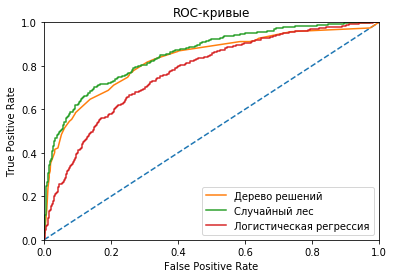

In [19]:
print('Дерево решений')
probabilities_valid_tree = best_model_tr.predict_proba(features_valid)
probabilities_one_valid = probabilities_valid_tree[:, 1]
print('AUC-ROC =',roc_auc_score(target_valid, probabilities_one_valid))
print('Случайный лес')
fpr, tpr, thresholds = roc_curve(target_valid, probabilities_one_valid)
probabilities_valid_random = best_model.predict_proba(features_valid)
probabilities_one_valid = probabilities_valid_random[:, 1]
print('AUC-ROC =',roc_auc_score(target_valid, probabilities_one_valid))
print('Логистическая регрессия')
fpr1, tpr1, thresholds1 = roc_curve(target_valid, probabilities_one_valid)
probabilities_valid_log = model_log.predict_proba(features_valid)
probabilities_one_valid = probabilities_valid_log[:, 1]
print('AUC-ROC =',roc_auc_score(target_valid, probabilities_one_valid))
fpr2, tpr2, thresholds2 = roc_curve(target_valid, probabilities_one_valid)


plt.figure()

plt.plot([0, 1], [0, 1], linestyle='--')
plt.plot(fpr, tpr, label = 'Дерево решений')
plt.plot(fpr1, tpr1, label = 'Случайный лес')
plt.plot(fpr2, tpr2, label = 'Логистическая регрессия')
plt.legend()
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.ylim([0.0, 1.0])
plt.xlim([0.0, 1.0])
plt.title('ROC-кривые')
plt.show()

Здесь видим, что оптимальными моделями являются "Дерево решений" и "Случайный лес"

In [20]:
def upsample(features, target, repeat): #функция выборки и увеличения дата сета с перемешиванием
    features_zeros = features[target == 0]
    features_ones = features[target == 1]
    target_zeros = target[target == 0]
    target_ones = target[target == 1]

    features_upsampled = pd.concat([features_zeros] + [features_ones] * repeat) #cоединение таблиц данных и повтор 
    target_upsampled = pd.concat([target_zeros] + [target_ones] * repeat)
    
    features_upsampled, target_upsampled = shuffle(
        features_upsampled, target_upsampled, random_state=12345) #перемешивание
    
    return features_upsampled, target_upsampled

features_upsampled, target_upsampled = upsample(features_train, target_train, 4)

In [21]:
target_upsampled.value_counts()

1    3708
0    3618
Name: Exited, dtype: int64

In [22]:
model_randomfor = None
best_result = 0
best_est = 0
best_depth = 0
for est in range(10, 101, 10): 
    for depth in range (1, 15):
        model = RandomForestClassifier(random_state=12345, n_estimators=est, max_depth=depth)
        model.fit(features_upsampled, target_upsampled) 
        predictions_valid = model.predict(features_valid) 
        result = f1_score(target_valid, predictions_valid)
        if result > best_result:
            model_randomfor = model
            best_result = result
            best_est = est
            best_depth = depth

print("F1", best_result, "Количество деревьев:", best_est, "Глубина:", best_depth)

F1 0.6314606741573033 Количество деревьев: 30 Глубина: 13


In [23]:
model_tree = None
result_tree = 0
best_depth1 = 0
for depth in range(1, 15):
    model_tr = DecisionTreeClassifier(random_state=12345, max_depth=depth) 
    model_tr.fit(features_upsampled, target_upsampled) 
    predictions_valid1 = model_tr.predict(features_valid) 
    result1 = f1_score(target_valid, predictions_valid1)
    if result1 > result_tree:
        model_tree = model_tr
        result_tree = result1
        depth1 = depth

print("F1:", result_tree, "Глубина дерева:", depth1)

F1: 0.6040000000000001 Глубина дерева: 5


In [24]:
log_f1 = 0 
for n in range(1,2):
    for i in range(100,110):
        model_log1 = LogisticRegression(solver = 'liblinear', max_iter = i, C = n)
        model_log1.fit(features_upsampled, target_upsampled)
        model_log_prediction = model_log1.predict(features_valid)
        new_f1 = f1_score(target_valid, model_log_prediction)
        if new_f1 > log_f1:
            log_f1 = new_f1
            model_log = model_log1


print("Целевой признак, F1-мера:",log_f1)

Целевой признак, F1-мера: 0.4942440521872601


Видно, что после балансировки показательи каждой модели возрасли. Модель со случайным лесом имеет наибольший результат по заданной метрике Ф1.

Дерево решений
AUC-ROC = 0.826636692018833
Случайный лес
AUC-ROC = 0.8405791921617964
Логистическая регрессия
AUC-ROC = 0.7732791978803301


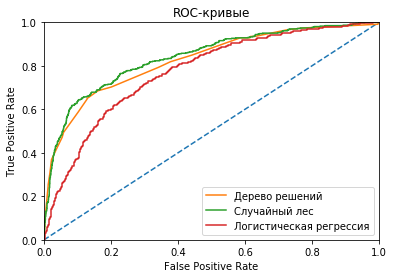

In [25]:
print('Дерево решений')
probabilities_valid_tree = model_tree.predict_proba(features_valid)
probabilities_one_valid = probabilities_valid_tree[:, 1]
print('AUC-ROC =',roc_auc_score(target_valid, probabilities_one_valid))
print('Случайный лес')
fpr, tpr, thresholds = roc_curve(target_valid, probabilities_one_valid)
probabilities_valid_random = model_randomfor.predict_proba(features_valid)
probabilities_one_valid = probabilities_valid_random[:, 1]
print('AUC-ROC =',roc_auc_score(target_valid, probabilities_one_valid))
print('Логистическая регрессия')
fpr1, tpr1, thresholds1 = roc_curve(target_valid, probabilities_one_valid)
probabilities_valid_log = model_log.predict_proba(features_valid)
probabilities_one_valid = probabilities_valid_log[:, 1]
print('AUC-ROC =',roc_auc_score(target_valid, probabilities_one_valid))
fpr2, tpr2, thresholds2 = roc_curve(target_valid, probabilities_one_valid)


plt.figure()

plt.plot([0, 1], [0, 1], linestyle='--')
plt.plot(fpr, tpr, label = 'Дерево решений')
plt.plot(fpr1, tpr1, label = 'Случайный лес')
plt.plot(fpr2, tpr2, label = 'Логистическая регрессия')
plt.legend()
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.ylim([0.0, 1.0])
plt.xlim([0.0, 1.0])
plt.title('ROC-кривые')
plt.show()

Функция по уменьшению выборки и балансировке.

In [26]:
def downsample(features, target, fraction):
    features_zeros = features[target == 0]
    features_ones = features[target == 1]
    target_zeros = target[target == 0]
    target_ones = target[target == 1]

    features_downsampled = pd.concat(
        [features_zeros.sample(frac=fraction, random_state=12345)] + [features_ones]) #случайная малая выборка (обрезка значения 
    #по frac в процентном содержании)
    target_downsampled = pd.concat(
        [target_zeros.sample(frac=fraction, random_state=12345)] + [target_ones])
    
    features_downsampled, target_downsampled = shuffle(
        features_downsampled, target_downsampled, random_state=12345)
    
    return features_downsampled, target_downsampled



In [27]:
features_downsampled, target_downsampled = downsample(features_train, target_train, 0.3)

In [28]:
target_downsampled.value_counts()

0    1085
1     927
Name: Exited, dtype: int64

In [29]:
model_randomfor_down = None
best_result = 0
best_est = 0
best_depth = 0
for est in range(10, 101, 10): 
    for depth in range (1, 15):
        model = RandomForestClassifier(random_state=12345, n_estimators=est, max_depth=depth)
        model.fit(features_downsampled, target_downsampled) 
        predictions_valid = model.predict(features_valid) 
        result = f1_score(target_valid, predictions_valid)
        if result > best_result:
            model_randomfor_down = model
            best_result = result
            best_est = est
            best_depth = depth

print("F1", best_result, "Количество деревьев:", best_est, "Глубина:", best_depth)

F1 0.6143277723258096 Количество деревьев: 30 Глубина: 7


In [30]:
model_tree_down = None
result_tree = 0
best_depth1 = 0
for depth in range(1, 15):
    model_tr = DecisionTreeClassifier(random_state=12345, max_depth=depth) 
    model_tr.fit(features_downsampled, target_downsampled) 
    predictions_valid1 = model_tr.predict(features_valid) 
    result1 = f1_score(target_valid, predictions_valid1)
    if result1 > result_tree:
        model_tree_down = model_tr
        result_tree = result1
        depth1 = depth

print("F1:", result_tree, "Глубина дерева:", depth1)

F1: 0.6113537117903929 Глубина дерева: 5


In [31]:
log_f1 = 0 
for n in range(1,2):
    for i in range(100,110):
        model_log1 = LogisticRegression(solver = 'liblinear', max_iter = i, C = n)
        model_log1.fit(features_downsampled, target_downsampled)
        model_log_prediction = model_log1.predict(features_valid)
        new_f1 = f1_score(target_valid, model_log_prediction)
        if new_f1 > log_f1:
            log_f1 = new_f1
            log_f_dowm = model_log1


print("Целевой признак, F1-мера:",log_f1)

Целевой признак, F1-мера: 0.5051020408163265


Дерево решений
AUC-ROC = 0.8178950792016926
Случайный лес
AUC-ROC = 0.8569234764872953
Логистическая регрессия
AUC-ROC = 0.7745992260917633


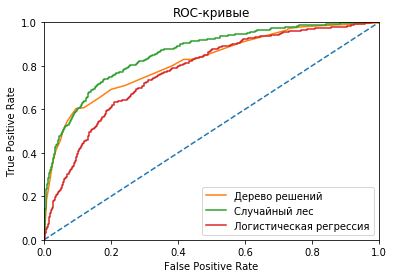

In [32]:
print('Дерево решений')
probabilities_valid_tree = model_tree_down.predict_proba(features_valid)
probabilities_one_valid = probabilities_valid_tree[:, 1]
print('AUC-ROC =',roc_auc_score(target_valid, probabilities_one_valid))
print('Случайный лес')
fpr, tpr, thresholds = roc_curve(target_valid, probabilities_one_valid)
probabilities_valid_random = model_randomfor_down.predict_proba(features_valid)
probabilities_one_valid = probabilities_valid_random[:, 1]
print('AUC-ROC =',roc_auc_score(target_valid, probabilities_one_valid))
print('Логистическая регрессия')
fpr1, tpr1, thresholds1 = roc_curve(target_valid, probabilities_one_valid)
probabilities_valid_log = log_f_dowm.predict_proba(features_valid)
probabilities_one_valid = probabilities_valid_log[:, 1]
print('AUC-ROC =',roc_auc_score(target_valid, probabilities_one_valid))
fpr2, tpr2, thresholds2 = roc_curve(target_valid, probabilities_one_valid)


plt.figure()

plt.plot([0, 1], [0, 1], linestyle='--')
plt.plot(fpr, tpr, label = 'Дерево решений')
plt.plot(fpr1, tpr1, label = 'Случайный лес')
plt.plot(fpr2, tpr2, label = 'Логистическая регрессия')
plt.legend()
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.ylim([0.0, 1.0])
plt.xlim([0.0, 1.0])
plt.title('ROC-кривые')
plt.show()

Сбалансировав выборки по целевому признаку двумя различными способами можно заметить, что метод с увеличением выборки дает наибольший показатель выборки.

## Тестирование модели

In [33]:
#features_ful = pd.concat([features_upsampled] + [features_valid]) #cоединение таблиц данных и повтор 
#ful_target = pd.concat([target_upsampled] + [target_valid])

Тестирование моделей повышающей выборки:

In [34]:
model_prediction = model_randomfor.predict(features_test)
f1_score(target_test, model_prediction)

0.5853131749460043

In [35]:
model_prediction44 = model_tree.predict(features_test)
f1_score(target_test, model_prediction44)

0.5836501901140685

In [36]:
model_prediction44 = model_log.predict(features_test)
f1_score(target_test, model_prediction44)

0.49595290654893304

Тестирование моделей понижающей выборки:

In [37]:
model_prediction = model_tree_down.predict(features_test)
f1_score(target_test, model_prediction)

0.5987525987525988

In [38]:
model_prediction = model_randomfor_down.predict(features_test)
f1_score(target_test, model_prediction)

0.6015180265654649

In [39]:
model_prediction = log_f_dowm.predict(features_test)
f1_score(target_test, model_prediction)

0.49791144527986636

На тестировании модели с понижающей выборкой показали себя лучше, стоит использовать в конечном счете их.

Вывод: В данной работе нам предстояло подготовить данные: обработать пропуски, убрать лишние столбцы, что могли оказать оказать пагубное воздействие на модели, а так же разделить данные на три выборки(так как тестовую нам не предоставили). Иследование проводилось на трех моделях: "Дерево решений", "Случайный лес", "Логистическая регрессия". Модели оценивались по метрике Ф1, после балансировки показания метрики выросли. На обучении лучше себя показали модели после балансировке увеличением выборки, однако на тесте показатели метрики Ф1 выше у балансировки малой выборкой. Так же были построены AUC-ROC кривые до балансировки и после, по этим показателям (ближе к 1) можно судить, что алгоритмы упорядочены. По итогу работы: стоит использовать модель случайного леса сбалансированного малой выборкой.